In [2]:
import pandas as pd
import re

In [6]:
# b1 = re.sub('(\\\\x(([a-z][a-z])|([0-9][0-9])|([0-9][a-z])|([a-z][0-9])))|\\r\\n', '', b).lstrip()
df1 = pd.read_json('/Users/sud/the_stuff/Studies/ECS/Project/critical_201303_23.json', lines=True)

In [87]:
# df = pd.read_json('/Users/sud/the_stuff/Studies/ECS/Project/critical_201205_23.json', lines=True)

In [7]:
# cleaning the banner of unwanted charecters...
for rows in range(len(df1)):
#     print(df1.iloc[rows]['banner'])
    df1.at[rows,'banner'] = re.sub('(\\\\x(([a-z][a-z])|([0-9][0-9])|([0-9][a-z])|([a-z][0-9])))|\\r\\n', '', df1.iloc[rows]['banner']).lstrip()

In [11]:
df1[:10]

,_id,ip,port,proto,banner,geo,name,t
0,"{'ip': '60.18.20.151', 'p': 23, 'h': '874a6e68...",60.18.20.151,23,tcp,!\r(none) login:,"{'c': 'CHN', 'city': 'Shenyang', 'reg': '19', ...",telnet,{'$date': 1362117628000}
1,"{'ip': '117.21.31.52', 'p': 23, 'h': 'eebcaad2...",117.21.31.52,23,tcp,**********************************************...,"{'c': 'CHN', 'loc': [35, 105]}",telnet,{'$date': 1362117630000}
2,"{'ip': '65.122.81.130', 'p': 23, 'h': '419218d...",65.122.81.130,23,tcp,[2J[Hname:,"{'c': 'USA', 'loc': [38, -97]}",telnet,{'$date': 1362117636000}
3,"{'ip': '182.186.51.34', 'p': 23, 'h': '8265527...",182.186.51.34,23,tcp,!BCM96328 Broadband RouterLogin:,"{'c': 'PAK', 'city': 'Multan', 'reg': '04', 'l...",telnet,{'$date': 1362117639000}
4,"{'ip': '222.175.187.64', 'p': 23, 'h': '3a3976...",222.175.187.64,23,tcp,"""L","{'c': 'CHN', 'city': 'Jinan', 'reg': '25', 'lo...",telnet,{'$date': 1362117639000}
5,"{'ip': '223.207.219.92', 'p': 23, 'h': 'f6b72c...",223.207.219.92,23,tcp,Password:,"{'c': 'THA', 'loc': [15, 100]}",telnet,{'$date': 1362117639000}
6,"{'ip': '183.28.225.253', 'p': 23, 'h': 'bd34af...",183.28.225.253,23,tcp,username:,"{'c': 'CHN', 'city': 'Foshan', 'reg': '30', 'l...",telnet,{'$date': 1362117641000}
7,"{'ip': '12.155.77.3', 'p': 23, 'h': '0522bbc8c...",12.155.77.3,23,tcp,ERRORERROR,"{'c': 'USA', 'loc': [38, -97]}",telnet,{'$date': 1362117644000}
8,"{'ip': '27.149.197.212', 'p': 23, 'h': '31556f...",27.149.197.212,23,tcp,!\r\r SG2K-II\rCopyright 2005-2008 sta...,"{'c': 'CHN', 'city': 'Beijing', 'reg': '22', '...",telnet,{'$date': 1362117644000}
9,"{'ip': '190.208.30.153', 'p': 23, 'h': 'cd137a...",190.208.30.153,23,tcp,**********************************************...,"{'c': 'CHL', 'city': 'Santiago', 'reg': '12', ...",telnet,{'$date': 1362117646000}


In [15]:
j = df1['banner'].unique()

In [16]:
len(j)

212153

In [40]:
for rows in range(len(df1)):
#     print(type(df1.iloc[rows]['geo']['c']))
    new_val = df1.iloc[rows]['geo']
    if new_val:
        df1.at[rows,'country'] = new_val['c']
    else:
        df1.at[rows,'country'] = ''
    

In [90]:
df1

,_id,ip,port,proto,banner,geo,name,t,country
0,"{'ip': '60.18.20.151', 'p': 23, 'h': '874a6e68...",60.18.20.151,23,tcp,!\r(none) login:,"{'c': 'CHN', 'city': 'Shenyang', 'reg': '19', ...",telnet,{'$date': 1362117628000},CHN
1,"{'ip': '117.21.31.52', 'p': 23, 'h': 'eebcaad2...",117.21.31.52,23,tcp,**********************************************...,"{'c': 'CHN', 'loc': [35, 105]}",telnet,{'$date': 1362117630000},CHN
2,"{'ip': '65.122.81.130', 'p': 23, 'h': '419218d...",65.122.81.130,23,tcp,[2J[Hname:,"{'c': 'USA', 'loc': [38, -97]}",telnet,{'$date': 1362117636000},USA
3,"{'ip': '182.186.51.34', 'p': 23, 'h': '8265527...",182.186.51.34,23,tcp,!BCM96328 Broadband RouterLogin:,"{'c': 'PAK', 'city': 'Multan', 'reg': '04', 'l...",telnet,{'$date': 1362117639000},PAK
4,"{'ip': '222.175.187.64', 'p': 23, 'h': '3a3976...",222.175.187.64,23,tcp,"""L","{'c': 'CHN', 'city': 'Jinan', 'reg': '25', 'lo...",telnet,{'$date': 1362117639000},CHN
...,...,...,...,...,...,...,...,...,...
2099079,"{'ip': '60.248.2.250', 'p': 23, 'h': '8d9d7a67...",60.248.2.250,23,tcp,#'!localhost login:,"{'c': 'TWN', 'city': 'Taipei', 'reg': '03', 'l...",telnet,{'$date': 1364792372000},TWN
2099080,"{'ip': '81.114.152.146', 'p': 23, 'h': 'c76c4c...",81.114.152.146,23,tcp,~\\|//~ -(o o)- -----------...,"{'c': 'ITA', 'loc': [42.83330154418945, 12.833...",telnet,{'$date': 1364792372000},ITA
2099081,"{'ip': '222.44.9.142', 'p': 23, 'h': '8838b283...",222.44.9.142,23,tcp,User Access VerificationUsername:,"{'c': 'CHN', 'city': 'Chaoyang', 'reg': '19', ...",telnet,{'$date': 1364792375000},CHN
2099082,"{'ip': '222.89.240.184', 'p': 23, 'h': '4d16a7...",222.89.240.184,23,tcp,!\rZXV10-I532_I516 login:,"{'c': 'CHN', 'city': 'Beijing', 'reg': '22', '...",telnet,{'$date': 1364792375000},CHN


In [91]:
# countries = df1.groupby('country')['country'].nunique()
countries = df1.country.value_counts()

In [92]:
len(countries)

232

In [96]:
countries[0:50]

CHN    669701
USA    263327
KOR    237134
BRA     73795
IND     65251
RUS     45631
ITA     45181
THA     39735
PAK     33966
TWN     28035
        25089
MYS     24349
COL     23374
VNM     22817
FRA     22588
GBR     21840
TUR     21245
DOM     20278
ESP     19251
HKG     17878
JPN     17586
POL     16422
DEU     15907
CAN     15686
PER     15605
SAU     14712
ECU     13865
MEX     13732
IDN     12574
ZAF     11593
AUS     10239
IRN     10234
ARG      9263
UKR      7602
CZE      7141
SLV      6445
CHL      6394
DNK      6169
PHL      6155
CRI      5560
KWT      5491
SWE      5451
SGP      5381
ISR      5366
PRI      5111
NLD      5059
NZL      3894
PRT      3811
EGY      3798
GEO      3694
Name: country, dtype: int64

In [100]:
import matplotlib.pyplot as plt

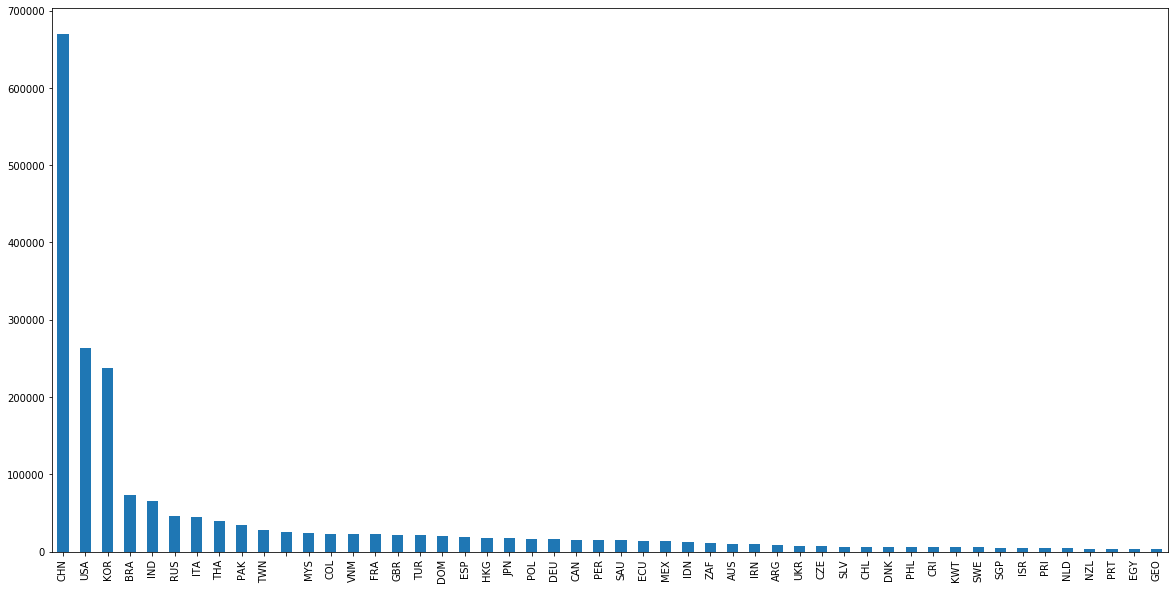

In [107]:
countries_plot = countries[0:50].plot.bar(figsize=(20,10))

In [108]:
df1._id[0]

{'ip': '60.18.20.151', 'p': 23, 'h': '874a6e68681c0611523484eba35c2618'}

In [110]:
count_router = 0
count_server = 0
router = "router"
for rows in range(len(df1)):
    if router in df1.iloc[rows]["banner"].lower():
        count_router+=1
    else:
        count_server+=1

In [111]:
count_router

184061

In [112]:
count_server

1915023

In [113]:
len(df1)

2099084